In [ ]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Загружаем данные
max_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Подготовка данных для обучения
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# Создание нейронной сети
model = Sequential()
model.add(Embedding(max_words, 128))  # Увеличен размер вектора представления
model.add(LSTM(64, return_sequences=True, recurrent_dropout=0.3))  # Увеличено количество ячеек и изменено значение dropout
model.add(Dropout(0.5))  # Добавлен слой Dropout для регуляризации
model.add(LSTM(32, recurrent_dropout=0.3))  # Второй слой LSTM
model.add(Dense(16, activation='relu'))  # Дополнительный полносвязный слой
model.add(Dropout(0.5))  # Еще один слой Dropout
model.add(Dense(1, activation='sigmoid'))  # Выходной слой

In [ ]:
# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Настройка коллбэка для ранней остановки
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Обучаем нейронную сеть с использованием EarlyStopping
history = model.fit(x_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[early_stopping])

Epoch 1/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 121s 664ms/step - accuracy: 0.6443 - loss: 0.6147 - val_accuracy: 0.7972 - val_loss: 0.4314
Epoch 2/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 135s 627ms/step - accuracy: 0.8504 - loss: 0.3927 - val_accuracy: 0.8260 - val_loss: 0.3941
Epoch 3/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 140s 617ms/step - accuracy: 0.8646 - loss: 0.3547 - val_accuracy: 0.8416 - val_loss: 0.3817
Epoch 4/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 145s 634ms/step - accuracy: 0.8644 - loss: 0.3496 - val_accuracy: 0.8200 - val_loss: 0.4151
Epoch 5/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 141s 625ms/step - accuracy: 0.8700 - loss: 0.3413 - val_accuracy: 0.8344 - val_loss: 0.3992
Epoch 6/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 114s 646ms/step - accuracy: 0.8959 - loss: 0.2820 - val_accuracy: 0.7396 - val_loss: 0.5189


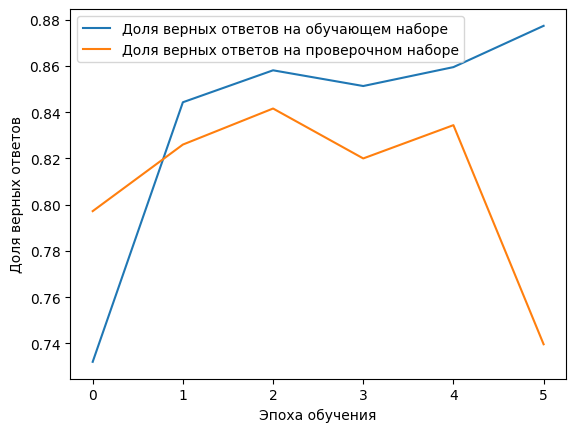

In [ ]:
# Визуализация результатов обучения
plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
# Проверяем работу сети на тестовом наборе данных
scores = model.evaluate(x_test, y_test, verbose=1)
print(f'Test accuracy: {scores[1]}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.7374 - loss: 0.5270
Test accuracy: 0.7355999946594238


In [ ]:
# Сохранение модели
model.save('movie_review_model.h5')

In [ ]:
from google.colab import files
files.download('movie_review_model.h5')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>